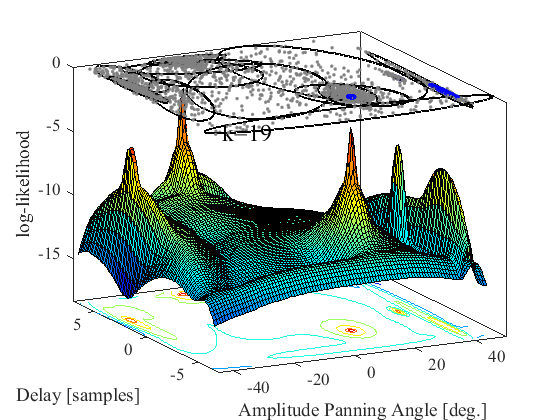

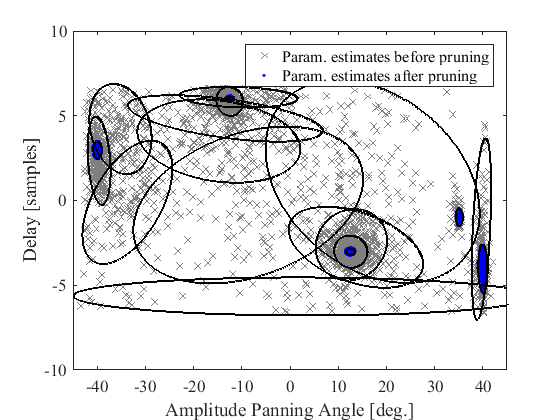

In [4]:
clear all;
cd /home/jacob/panning_project/test_programs/;
load mats/test_covration_100iter_notoptimal16april.mat
index=64;%randi(100);
X=savedX{index};
trueNumClusters = size(true(index).Points,1);


[mindl, bestk, bestmu, bestcov,bestpp,safemu, safemuMean, bestcovCovRatio, bestmuCovRatio, bestppCovRatio,X2] = smc_GMM_MMDL_normdetC(X, fs,trueNumClusters);
view(-27,19);

figure;
plot(X(:,1)*45,X(:,2)*150e-6*fs,'x','Color',[0.5 0.5 0.5]); xlim([-45 45]); ylim([-10 10])
for ii=1:length(bestppCovRatio)
hold on;
    plot(X2(:,1)*45,X2(:,2)*150e-6*fs,'b.')
end
for comp=1:length(bestpp)
    hold on;
    elipsnorm_interior_points(bestmu([1,2],comp),bestcov([1,2],[1,2],comp),2,0, X', fs)
end
%drawnow
hold off;
xlabel('Amplitude Panning Angle [deg.]');
ylabel('Delay [samples]');
legend('Param. estimates before pruning','Param. estimates after pruning')